## Personal ML project - Diabetes prediction 

1. Our database: Diabetes 130-US Hospitals for Years 1999-2008
https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

# Number of instances
101766

# Associated Tasks
Classification, Clustering



In [39]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

# Download the zip file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as z:
    # Extract the main CSV file
    with z.open('dataset_diabetes/diabetic_data.csv') as f:
        diabetes = pd.read_csv(f)
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Exploring the data 

- Histogram, boxplots and bar charts will be used to analyze the structure of the data 
- Check the feature distribution and evaluate what are the most related with diabetes 
- Check for the categories that posses an specific meaning 

In [40]:
print(diabetes.shape)
print(diabetes.columns)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [41]:
# Do a train test split of the original training data
from sklearn.model_selection import train_test_split

diabetes_train, diabetes_test = train_test_split(diabetes, test_size=0.2, random_state=42)

print("Train data shape:", diabetes_train.shape)
print("Test data shape:", diabetes_test.shape)



Train data shape: (81412, 50)
Test data shape: (20354, 50)


## We will visualize the distributions and relevant relationships

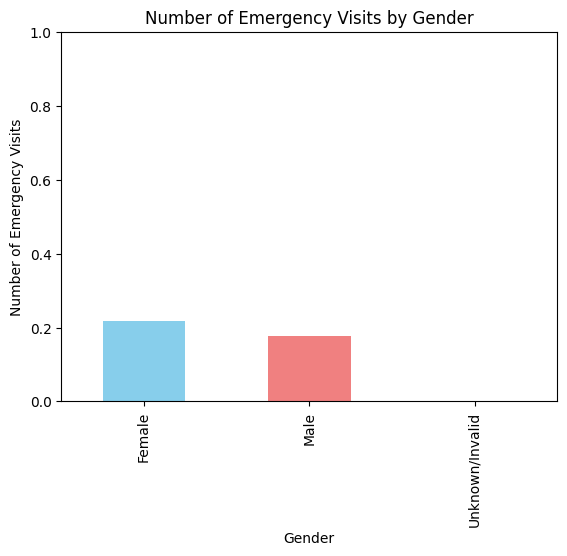

In [42]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


def plot_number_emergency_by_gender(df):
    number_emergency = df.groupby("gender")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Gender")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Gender")
    plt.ylim(0, 1)
    plt.show()

plot_number_emergency_by_gender(diabetes_train)


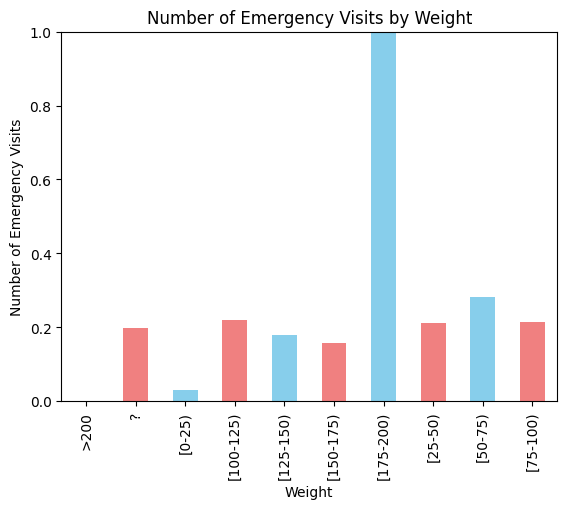

In [43]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt


def plot_number_emergency_by_weight(df):
    number_emergency = df.groupby("weight")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Weight")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Weight")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_weight(diabetes_train)




In [60]:
def map_weight_category(weight_str):
    """
    Maps the original weight bin/range string to a simplified weight category.
    """

    weight_map = {
        '[0-25)': 'Underweight',
        '[25-50)': 'Underweight',
        '[50-75)': 'Normal',
        '[75-100)': 'Normal',
        '[100-125)': 'Overweight',
        '[125-150)': 'Obese',
        '[150-175)': 'Obese',
        '[175-200)': 'Severely Obese',
        '[200-225)': 'Severely Obese',
        '[225-250)': 'Morbidly Obese',
        '[250-275)': 'Morbidly Obese',
        '[275-300)': 'Morbidly Obese',
        '[300-325)': 'Morbidly Obese',
        '[325-350)': 'Morbidly Obese',
        '[350-375)': 'Morbidly Obese',
        '[375-400)': 'Morbidly Obese',
        'Over 400': 'Morbidly Obese',
        '?': 'Normal'
    }

    return weight_map.get(weight_str, 'Unknown')
# Apply to diabetes_train
diabetes_train['weight_group'] = diabetes_train['weight'].apply(map_weight_category)
print("Organized weight groups:", diabetes_train['weight_group'].unique())


Organized weight groups: ['Normal' 'Obese' 'Underweight' 'Overweight' 'Severely Obese' 'Unknown']


In [45]:
# Print unique values/groups in the 'weight' column
print("Original weight groups:", diabetes_train['weight'].unique())

# Reorganize weight groups into ordered categories
# Example: group into bins (if weights are ranges), or map to ordered categories

# If weight is in ranges like '[75-100)', '[100-125)', etc.
weight_order = [
    'Underweight', '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '[200-225)', '[225-250)', '[250-275)', '[275-300)', '[300-325)', '[325-350)', '[350-375)', '[375-400)', 'Over 400', 'Unknown'
]

# Apply the mapping to create a new column with organized weight groups
diabetes_train['weight_group'] = diabetes_train['weight'].map(weight_map)
print("Organized weight groups:", diabetes_train['weight_group'].unique())




Original weight groups: ['?' '[50-75)' '[125-150)' '[75-100)' '[0-25)' '[150-175)' '[100-125)'
 '[25-50)' '[175-200)' '>200']
Organized weight groups: ['Normal' 'Obese' 'Underweight' 'Overweight' 'Severely Obese' nan]


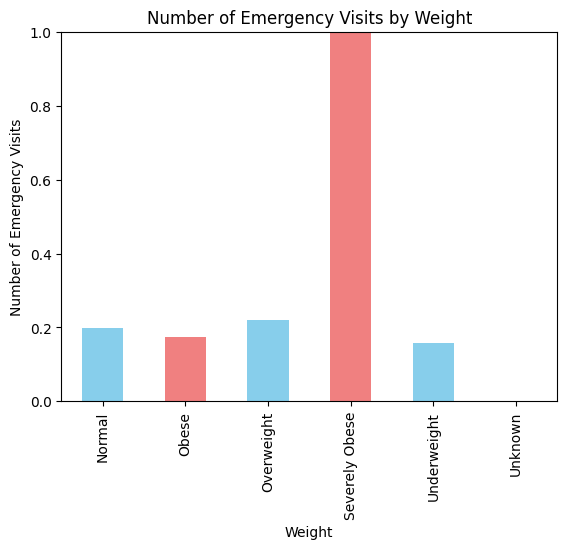

In [61]:
def plot_number_emergency_by_weight(df):
    number_emergency = df.groupby("weight_group")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Weight")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Weight")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_weight(diabetes_train)

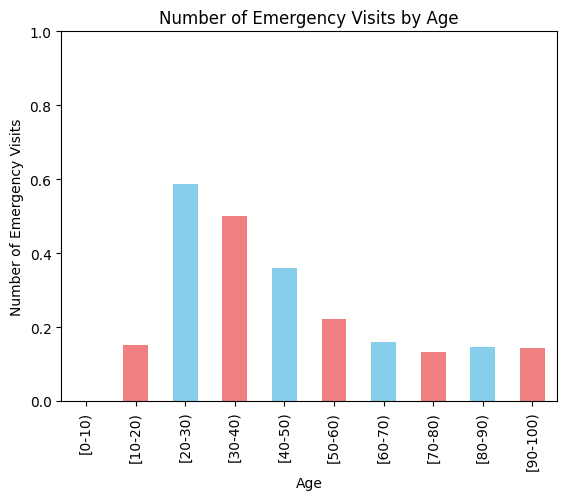

In [47]:
def plot_number_emergency_by_age(df):
    number_emergency = df.groupby("age")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Age")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Age")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_age(diabetes_train)

In [48]:
# Define a function to map age bins to new categories
def map_age_category(age_str):
    # Remove brackets and split by '-'
    age_str = age_str.strip('[]')
    start, end = age_str.split('-')
    start = int(start)
    end = int(end.replace(')', ''))
    if start < 30:
        return '0-30'
    elif start < 60:
        return '30-60'
    elif start < 90:
        return '60-90'
    else:
        return '90-120'

# Apply to diabetes_train and diabetes_train_clean
diabetes_train['age_group'] = diabetes_train['age'].apply(map_age_category)

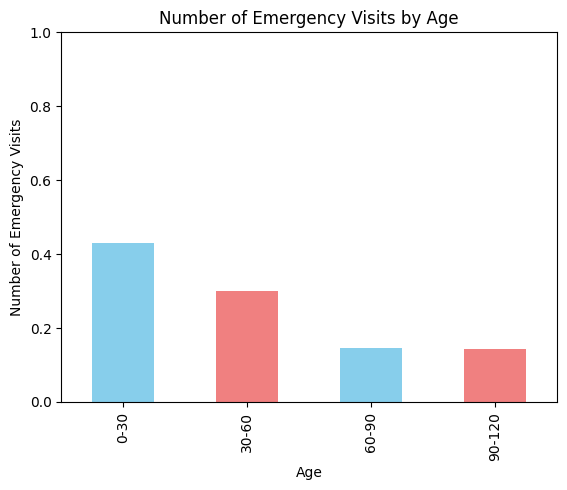

In [50]:
def plot_number_emergency_by_age(df):
    number_emergency = df.groupby("age_group")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Age")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Age")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_age(diabetes_train)

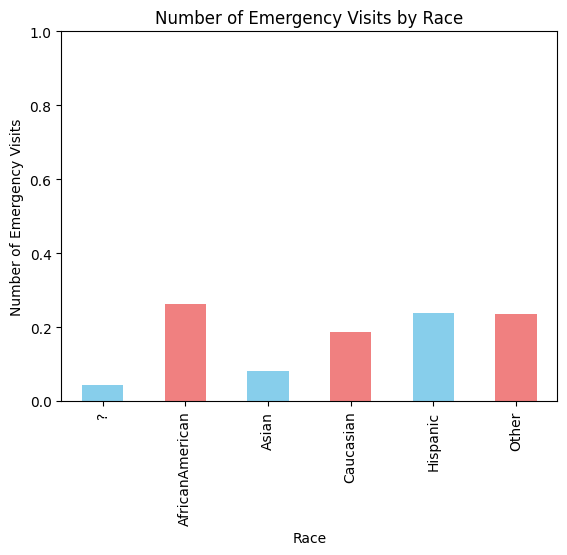

In [51]:
def plot_number_emergency_by_race(df):
    number_emergency = df.groupby("race")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Race")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Race")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_race(diabetes_train)

race_group
Caucasian          60871
AfricanAmerican    15325
Other               3049
Hispanic            1650
Asian                517
Name: count, dtype: int64


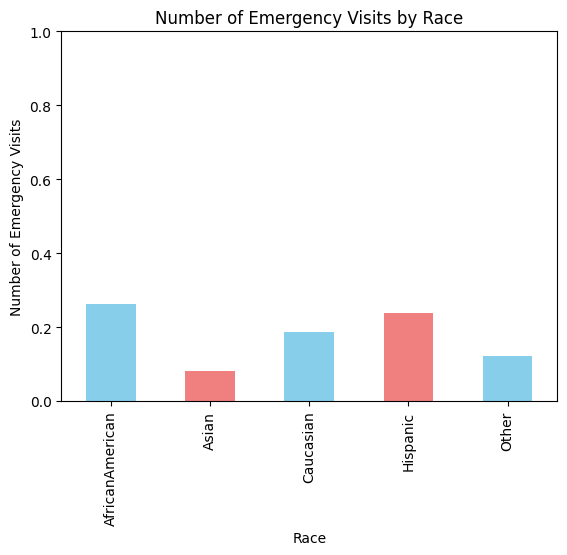

In [52]:
# Combine 'Other' and '?' categories in the 'race' column of diabetes_train and save as 'race_group'
diabetes_train['race_group'] = diabetes_train['race'].replace('?', 'Other')
print(diabetes_train['race_group'].value_counts())

def plot_number_emergency_by_race(df):
    number_emergency = df.groupby("race_group")["number_emergency"].mean()
    number_emergency.plot(kind="bar", color=["skyblue", "lightcoral"])
    plt.title("Number of Emergency Visits by Race")
    plt.ylabel("Number of Emergency Visits")
    plt.xlabel("Race")
    plt.ylim(0, 1)
    plt.show()
plot_number_emergency_by_race(diabetes_train)

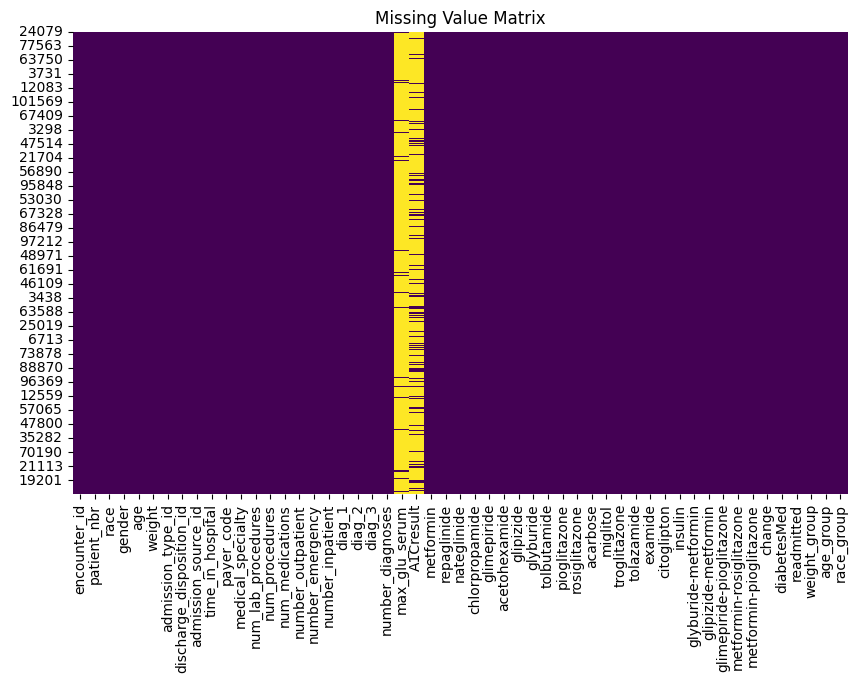

In [53]:
def plot_missing_value_matrix(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title("Missing Value Matrix")
    plt.show()

plot_missing_value_matrix(diabetes_train)

## Drop 2 of the columns that have missing information for sure 
**Completely excluded them because the missing values are too abundant**
- max_glu_serum
- A1Cresult

**Excluded because I want to make a basing model first later we can integrate them if the performance of the model is not proper**

- Payer_code
- medical_speciality 
- diag_1, diag_2, diag_3

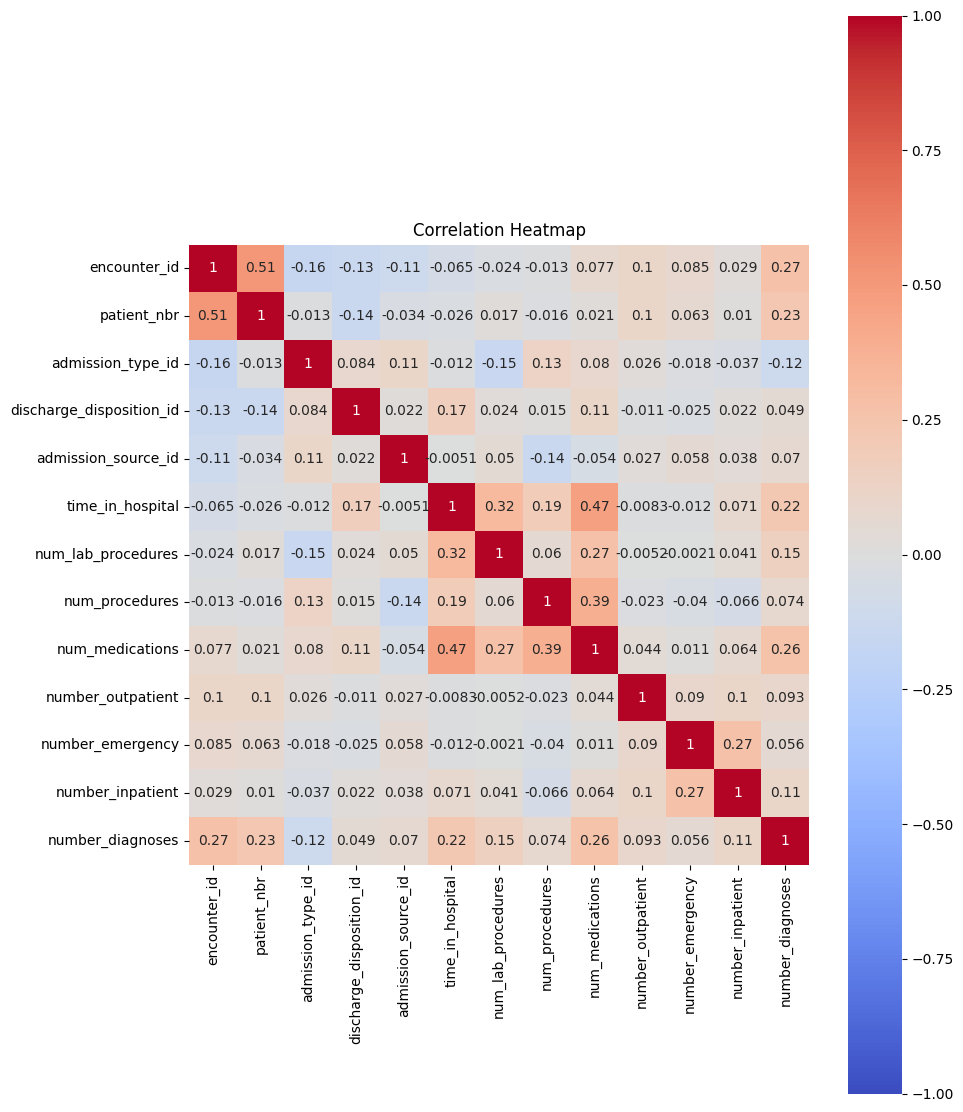

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df):
    # keep only the columns we want, if they exist
    cols = df.select_dtypes(include=['number']).columns

    # coerce to numeric in case 'age' is stored as strings/bins
    data = df[cols].apply(pd.to_numeric, errors='coerce')

    plt.figure(figsize=(10, 14))  # set size BEFORE plotting
    ax = sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, square=True)
    ax.set_title("Correlation Heatmap")
    plt.show()

# call
plot_correlation_heatmap(diabetes_train)


In [55]:
#So from the training data, we can see that the columns 'max_glu_serum', 'A1Cresult', 'Payer_code', 'medical_speciality',
# 'diag_1', 'diag_2', and 'diag_3' have a lot of missing values, so I want to remove them from the training data 

cols_to_drop = ['max_glu_serum', 'A1Cresult', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3']
diabetes_train_clean = diabetes_train.drop(columns=cols_to_drop)
diabetes_train_clean.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,weight_group,age_group,race_group
24079,81844290,94788,Caucasian,Female,[70-80),?,1,1,7,4,...,No,No,No,No,No,No,NO,Normal,60-90,Caucasian
98079,396159158,135023315,Caucasian,Male,[50-60),?,1,1,7,1,...,No,No,No,No,No,No,>30,Normal,30-60,Caucasian
6237,31258956,18397782,Caucasian,Male,[80-90),?,1,1,7,4,...,No,No,No,No,No,Yes,NO,Normal,60-90,Caucasian
72208,210691074,67509558,Caucasian,Male,[80-90),?,1,3,7,3,...,No,No,No,No,Ch,Yes,NO,Normal,60-90,Caucasian
33075,104902980,23272362,AfricanAmerican,Female,[70-80),?,1,11,7,11,...,No,No,No,No,No,No,NO,Normal,60-90,AfricanAmerican


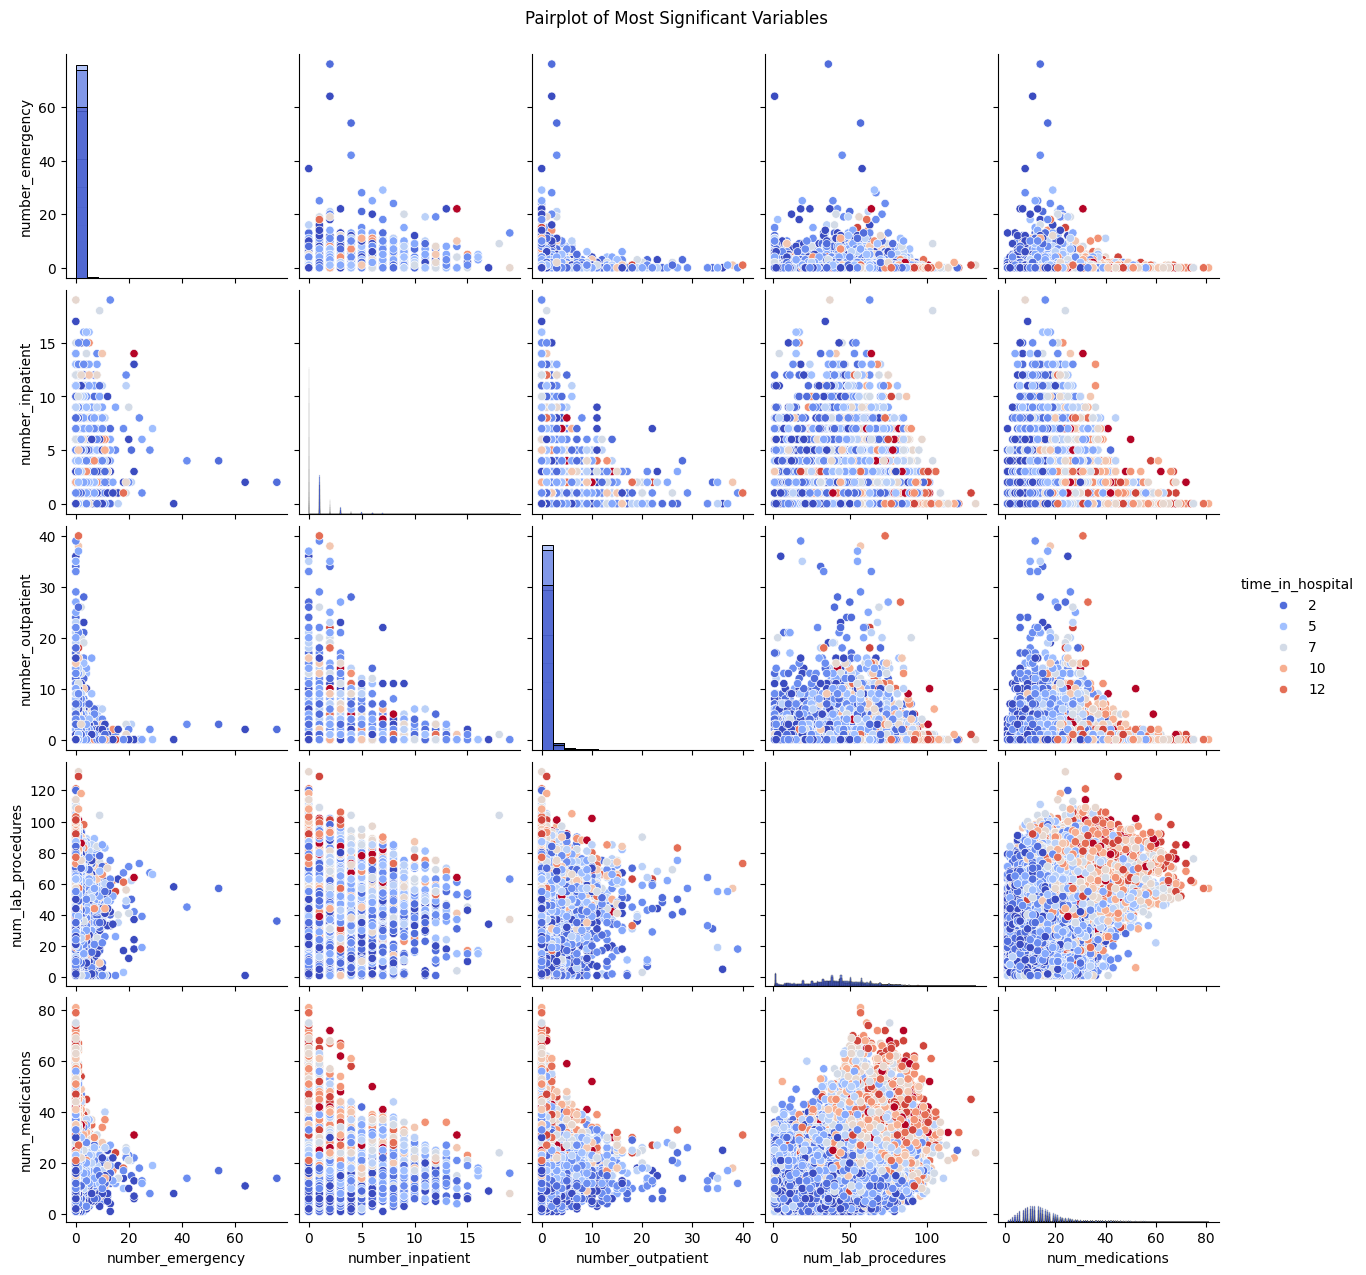

In [56]:
# Select columns that are likely to be most significant for diabetes/emergency visits
# We'll include some numeric features and the encoded categorical columns
important_cols = [
    'number_emergency', 
    'number_inpatient',
    'number_outpatient',
    'num_lab_procedures',
    'num_medications',
    'time_in_hospital',
    'age_group',
    'weight_group',
    'race_group',
    'gender'
]

# Filter to only columns that exist in encoded_df
pairplot_cols = [col for col in important_cols if col in diabetes_train_clean.columns]

sns.pairplot(diabetes_train_clean[pairplot_cols], hue='time_in_hospital', diag_kind='hist', palette='coolwarm')
plt.suptitle("Pairplot of Most Significant Variables", y=1.02)
plt.show()

## Classificator


- I want my classificator to predict how many days my diabetic patients have been hospitalized base on the data set to predict the time_in_hospital accurately, to keep working with this dataset we will have to 

/var/folders/zn/168nw9p56h9_1x_smvw9yfcr0000gn/T/ipykernel_27164/4157934415.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, ax=axes[0], palette="Blues")
/var/folders/zn/168nw9p56h9_1x_smvw9yfcr0000gn/T/ipykernel_27164/4157934415.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weight_group', data=df, ax=axes[1], palette="Greens")
/var/folders/zn/168nw9p56h9_1x_smvw9yfcr0000gn/T/ipykernel_27164/4157934415.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='race_group', data=df, ax=axes[2], palette

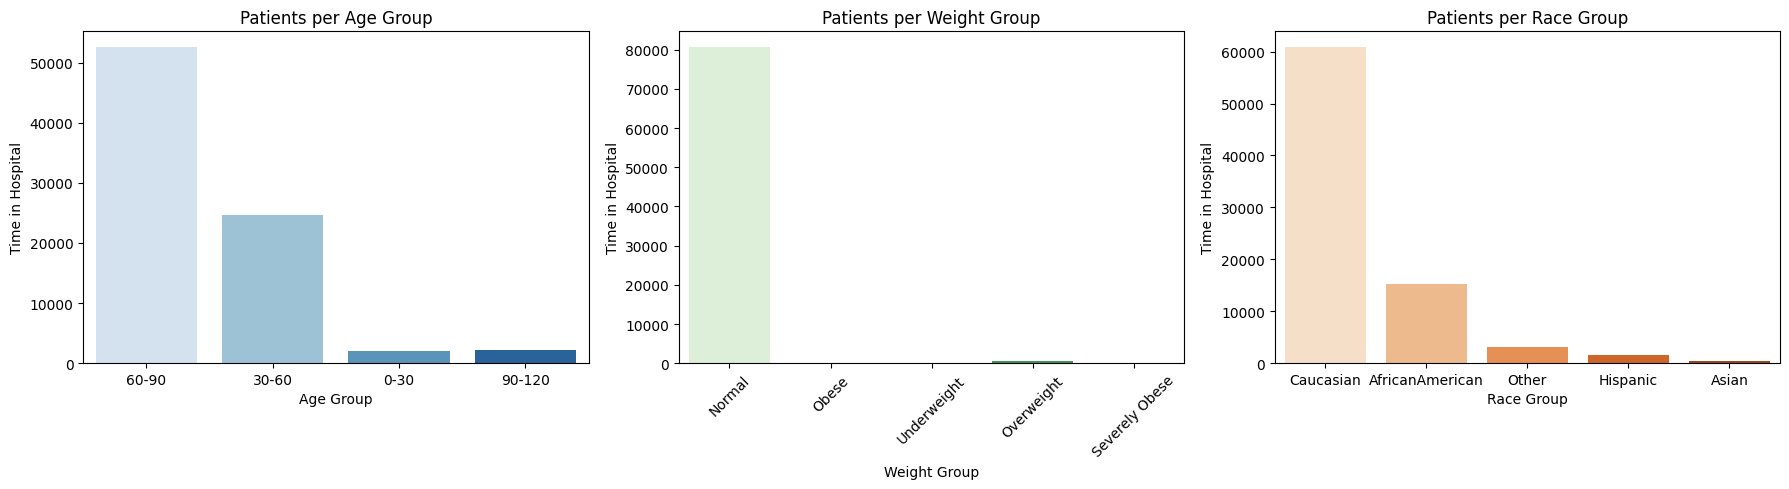

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

df = diabetes_train.dropna(
    subset=['time_in_hospital', 'age_group', 'weight_group', 'race_group']
).copy()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age group distribution
sns.countplot(x='age_group', data=df, ax=axes[0], palette="Blues")
axes[0].set_title("Patients per Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Time in Hospital")

# Weight group distribution
sns.countplot(x='weight_group', data=df, ax=axes[1], palette="Greens")
axes[1].set_title("Patients per Weight Group")
axes[1].set_xlabel("Weight Group")
axes[1].set_ylabel("Time in Hospital")
axes[1].tick_params(axis='x', rotation=45)

# Race group distribution
sns.countplot(x='race_group', data=df, ax=axes[2], palette="Oranges")
axes[2].set_title("Patients per Race Group")
axes[2].set_xlabel("Race Group")
axes[2].set_ylabel("Time in Hospital")

plt.tight_layout()
plt.show()


In [58]:
diabetes_train.to_parquet("data/02_train.parquet", index=False)
diabetes_test.to_parquet("data/02_test.parquet", index=False)